## Census Project

In [2]:
#importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
data = pd.read_csv("W-T2_A24census-5.csv")
display(data)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Harris Wall,Samuel,Thompson,62,Head,Divorced,Male,Actuary,NaN,Catholic
1,1,Harris Wall,Anne,Thompson,5,Granddaughter,NaN,Female,Student,NaN,NaN
2,2,Harris Wall,Shaun,Simpson,57,Head,Married,Male,Chief of Staff,NaN,Christian
3,2,Harris Wall,Kim,Simpson,57,Wife,Married,Female,Unemployed,NaN,NaN
4,3,Harris Wall,Sylvia,Harper,47,Head,Single,Female,Academic librarian,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10596,1,Kestrel Haven,Emma,Young,35,Head,Single,Female,Contractor,NaN,NaN
10597,1,Kestrel Haven,Thomas,Palmer,40,Partner,Single,Male,Unemployed,NaN,NaN
10598,1,Kestrel Haven,Jacqueline,Young,9,Daughter,NaN,Female,Student,NaN,NaN
10599,1,Kestrel Haven,Sharon,Young,6,Daughter,NaN,Female,Student,NaN,NaN


In [3]:
data.isnull().sum() #check for the count of missing value(NaN) per column in the dataset

House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House      760
Marital Status                    2501
Gender                               0
Occupation                           0
Infirmity                        10512
Religion                          6162
dtype: int64

In [4]:
data.dtypes #check datatypes of each column

House Number                     object
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [5]:
# define a Function that loops through all columns with object or category dtype
def get_unique_values(data):
    for col in data.select_dtypes(include=['object', 'category', 'int64']).columns:
        print(f"Unique values in '{col}':")
        print(data[col].unique())
        print("-" * 50)
        
#calling the function and passing the argument "Data" to view unique values of each column
get_unique_values(data) 

Unique values in 'House Number':
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177'

### Cleaning the columns in the dataset

In [6]:

# Convert 'age' column to numeric, coercing errors to NaN and replace str to int
data['Age'] = data['Age'].replace('Three', 3)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce').round().astype('int')

# Convert 'House Number' column to numeric, coercing errors to NaN and replace str to int
data['House Number'] = data['House Number'].replace('Nine', 9)
data['House Number'] = pd.to_numeric(data['House Number'], errors='coerce')

# Clean 'Relationship to Head of House' column 
data['Relationship to Head of House'] = data['Relationship to Head of House'].str.strip().str.title()
data['Relationship to Head of House'] = data['Relationship to Head of House'].replace({
    'Neice': 'Niece'
})

# Clean 'Marital Status' column by Standardizing Marital Status values by mapping various inputs to Divored, Married, Single and Widowed
data['Marital Status'] = data['Marital Status'].replace({
    'M': 'Married', 'W': 'Widowed', 'S': 'Single', 'D': 'Divorced', ' ': np.nan
})
data['Marital Status'] = data['Marital Status'].str.strip().str.title()

# Clean 'Gender' column by Standardizing gender values by mapping various inputs to Male or Female
data['Gender'] = data['Gender'].replace({
    'F': 'Female', 'f': 'Female', 'M': 'Male', 'm': 'Male', 'female': 'Female', 'male': 'Male', ' ': np.nan
})
data['Gender'] = data['Gender'].str.strip().str.title()

# Clean 'Occupation' column (basic cleanup - title case and strip)
data['Occupation'] = data['Occupation'].astype(str).str.strip()

# Clean 'Infirmity' column
data['Infirmity'] = data['Infirmity'].replace({' ': np.nan})
data['Infirmity'] = data['Infirmity'].str.strip().str.title()

# Clean 'Religion' column
data['Religion'] = data['Religion'].replace({' ': np.nan})
data['Religion'] = data['Religion'].str.strip().str.title()
data['Religion'] = data['Religion'].replace({
    'Buddist': 'Buddhist',
    'sith': 'Sikh',
    'private': 'Unknown'
})

In [7]:
print(data['Religion'].unique())

['Catholic' nan 'Christian' 'Methodist' 'Sikh' 'Muslim' 'Jewish' 'Baptist'
 'Private' 'Buddhist' 'Sith' 'Agnostic' 'Pagan' 'Jedi']


In [8]:
data.dtypes #check datatypes for each column

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int64
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [9]:
#view the unique values for each column
get_unique_values(data)

Unique values in 'House Number':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230]
---------------------------------

In [10]:
data.isnull().sum() #check for the count of missing value(NaN) per column in the dataset

House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House      760
Marital Status                    2502
Gender                               1
Occupation                           0
Infirmity                        10522
Religion                          6163
dtype: int64

## Gender

In [11]:
#Fill Gender missing values based on Relationship to Head of House
def gender(row):
    if pd.isna(row['Gender']):
        male_roles = ['Son', 'Grandson', 'Husband', 'Step-Son', 'Nephew', 'Adopted Son', 'Adopted Grandson']
        female_roles = ['Daughter', 'Granddaughter', 'Wife', 'Step-Daughter', 'Niece', 'Adopted Daughter', 'Adopted Granddaughter']
        rel = row['Relationship to Head of House']
        if rel in male_roles:
            return 'Male'
        elif rel in female_roles:
            return 'Female'
    return row['Gender']

data['Gender'] = data.apply(gender, axis=1)

### Marital Status

In [12]:
#define mode of marital status for those older than 70
mode_70_plus = data.loc[data['Age'] > 70, 'Marital Status'].mode()[0]

#Fill Marital Status missing values logically based on Age, Relationship to Head of House
def marital_status(row):
    if pd.isna(row['Marital Status']):
        age = row['Age']
        rel = row['Relationship to Head of House']
        if age < 18:
            return 'Single'
        elif rel in ['Wife', 'Husband']:
            return 'Married'
        elif age > 70:
            return mode_70_plus
        else:
            return 'unknown'
    return row['Marital Status']

data['Marital Status'] = data.apply(marital_status, axis=1)

## Religion

In [13]:
# Fill missing or inconsistent religion values by assigning the most common religion per household
data['Religion'] = data.groupby(['House Number', 'Street', 'Surname'])['Religion'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

## Infirmity

In [14]:
# Fill Infirmity missing values with 'None' to indicate that the individual has no reported infirmity
data['Infirmity'] = data['Infirmity'].fillna('None')

## Relationship to Head of House

In [15]:
# to identifier an household
data['household_id'] = data['House Number'].astype(str) + '_' + data['Street'].astype(str)

# Define imputation logic based on MArital status, age, Relationship to Head of House
def relationship(group):
    head = group[group['Relationship to Head of House'] == 'Head']
    head_surname = head['Surname'].iloc[0] if not head.empty else None

    for idx in group[group['Relationship to Head of House'].isna()].index:
        gender = group.at[idx, 'Gender']
        age = group.at[idx, 'Age']
        marital = group.at[idx, 'Marital Status']
        surname = group.at[idx, 'Surname']

        # Rule 1: Married people
        if marital == 'Married':
            if gender == 'Female':
                group.at[idx, 'Relationship to Head of House'] = 'Wife'
            elif gender == 'Male':
                group.at[idx, 'Relationship to Head of House'] = 'Husband'
        # Rule 2: Children
        elif age < 18:
            if gender == 'Female':
                group.at[idx, 'Relationship to Head of House'] = 'Daughter'
            elif gender == 'Male':
                group.at[idx, 'Relationship to Head of House'] = 'Son'
        # Rule 3: Everyone else
        else:
            group.at[idx, 'Relationship to Head of House'] = 'Lodger'

    return group

# Apply imputation
data = data.groupby('household_id', group_keys=False).apply(relationship)


In [16]:
data.isnull().sum() #check for the count of missing value(NaN) per column in the dataset

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
household_id                     0
dtype: int64

In [17]:
data = data.dropna()
data.shape

(10601, 12)

In [18]:
data.columns #display all column names

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'household_id'],
      dtype='object')

## Age Pyramid

In [19]:
# For age pyramid plotting
def plot_age_pyramid(data, age_col='Age', gender_col='Gender', title='Age Pyramid'):
    # Bin ages into groups
    bins = [0, 5, 15, 25, 35, 45, 55, 65, 75, 85, 120]
    labels = ['0-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
    data['AgeGroup'] = pd.cut(data[age_col], bins=bins, labels=labels, right=False)

    # Group by AgeGroup and Gender
    pyramid_data = data.groupby(['AgeGroup', gender_col]).size().unstack(fill_value=0)

    # Make male values negative for pyramid effect
    pyramid_data['Male'] = -pyramid_data.get('Male', 0)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    pyramid_data.plot(kind='barh', stacked=False, ax=ax, color=['#1f77b4', '#ff7f0e'])
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Population Count')
    ax.set_ylabel('Age Group')
    ax.legend(loc='upper right')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

In [20]:
# Age Groups (for children, working, retired)
def age_category(age):
    if age < 18:
        return 'Child'
    elif age < 65:
        return 'Working Age'
    else:
        return 'Retired'

data['AgeCategory'] = data['Age'].apply(age_category)

# Define unemployed group - using Occupation = 'Unemployed' or equivalent
data['IsUnemployed'] = data['Occupation'].str.lower().str.contains('unemployed|none|not working')

# Define students
data['IsStudent'] = data['Occupation'].str.lower().str.contains('student')

In [21]:
# Commuters proxy - students + occupation types like 'commuter', 'worker in city' etc.
data['IsCommuter'] = data['IsStudent'] | data['Occupation'].str.lower().str.contains('commuter|worker')

data['Infirmity'].value_counts()

Infirmity
None                   10522
Physical Disability       27
Deaf                      18
Disabled                  10
Mental Disability          9
Unknown Infection          8
Blind                      7
Name: count, dtype: int64

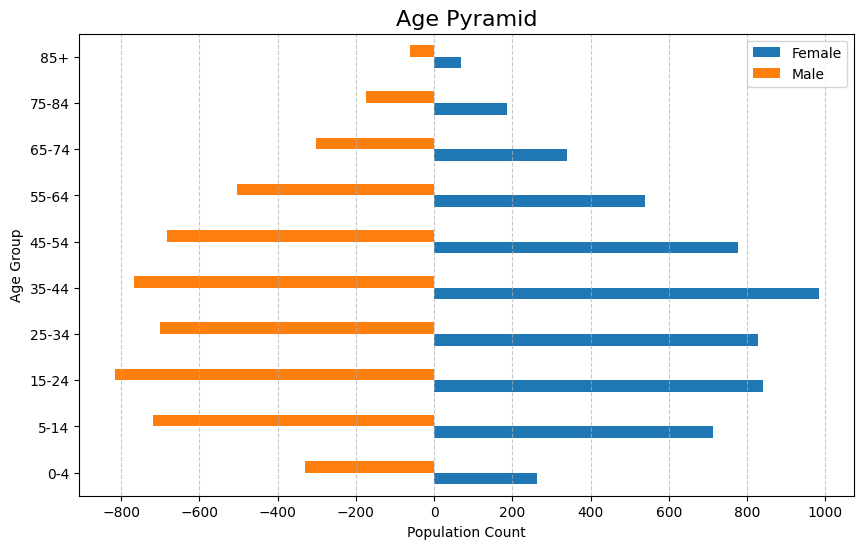

In [22]:
#Age Pyramid
plot_age_pyramid(data)

In [23]:
# But can test proportion of children vs retirees as proxy of growth potential:
child_pct = (data['AgeCategory'] == 'Child').mean()
retired_pct = (data['AgeCategory'] == 'Retired').mean()
working_pct = (data['AgeCategory'] == 'Working Age').mean()

print(f"Population proportions: Children: {child_pct:.2%}, Working Age: {working_pct:.2%}, Retired: {retired_pct:.2%}")


Population proportions: Children: 23.59%, Working Age: 65.71%, Retired: 10.70%


In [24]:
# Unemployment rate by age category
unemp_by_age = data.groupby('AgeCategory')['IsUnemployed'].mean()
print("Unemployment rate by age group:")
print(unemp_by_age)

Unemployment rate by age group:
AgeCategory
Child          0.000000
Retired        0.040564
Working Age    0.088573
Name: IsUnemployed, dtype: float64


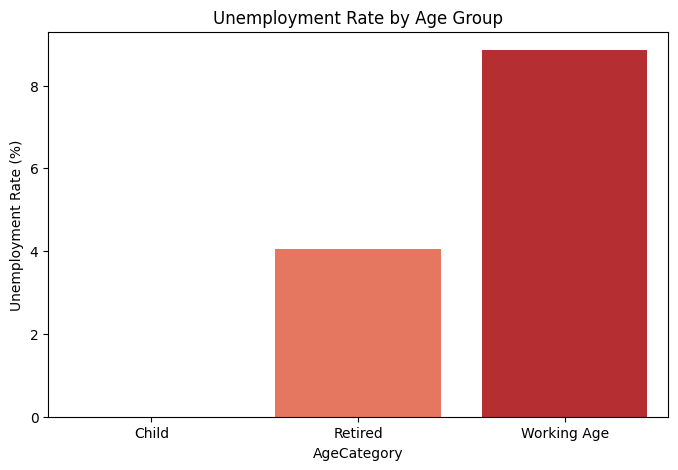

In [25]:
# Visualize unemployment by age group
plt.figure(figsize=(8,5))
sns.barplot(x=unemp_by_age.index, y=unemp_by_age.values*100, palette='Reds')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Age Group')
plt.show()

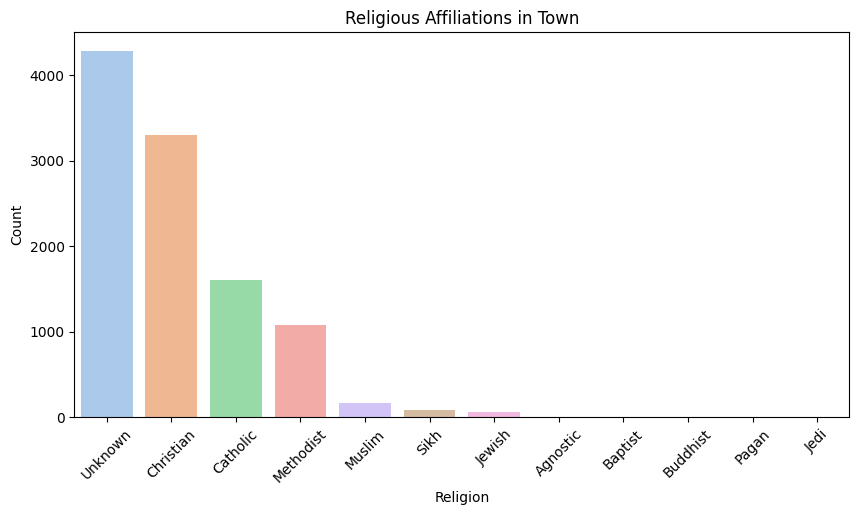

In [26]:
# Combine similar religion categories
data['Religion'] = data['Religion'].replace({
    'Sith': 'Sikh',
    'Private': 'Unknown'  # or reverse if you prefer 'Unknown'
})

# Religious affiliation counts
religion_counts = data['Religion'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=religion_counts.index, y=religion_counts.values, palette='pastel')
plt.title('Religious Affiliations in Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

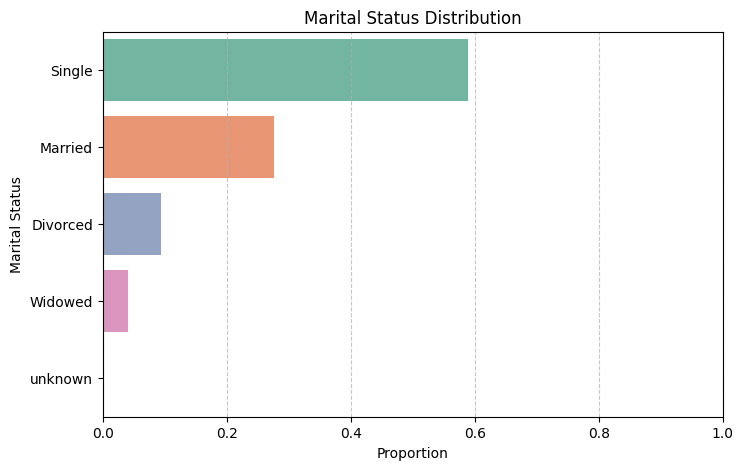

In [27]:
# Marital status summary (normalized to get proportions)
marital_counts = data['Marital Status'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=marital_counts.values, y=marital_counts.index, palette='Set2')
plt.xlabel('Proportion')
plt.ylabel('Marital Status')
plt.title('Marital Status Distribution')
plt.xlim(0, 1)  # Since proportions range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# Commuters estimation:
num_commuters = data['IsCommuter'].sum()
total_pop = len(data)
print(f"Estimated commuter population: {num_commuters} ({num_commuters/total_pop:.2%})")

Estimated commuter population: 2860 (26.98%)


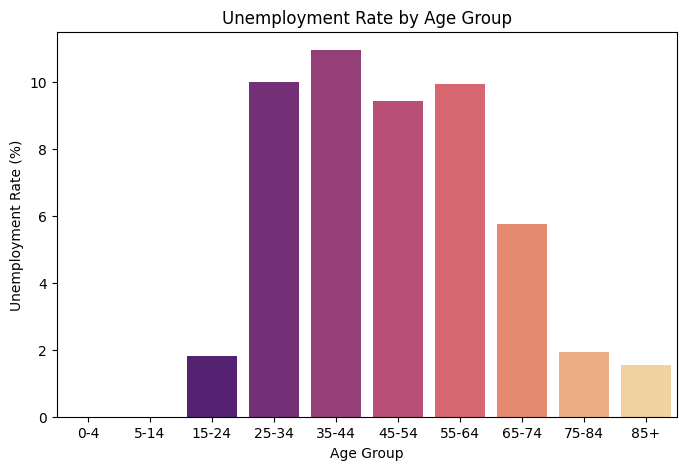

In [29]:
# Let's create a simple unemployment flag
data['Unemployed'] = data['Occupation'].str.contains('unemployed', case=False, na=False)

unemp_age = data.groupby('AgeGroup')['Unemployed'].mean().reset_index()
unemp_age['Unemployment Rate (%)'] = unemp_age['Unemployed'] * 100

plt.figure(figsize=(8,5))
sns.barplot(data=unemp_age, x='AgeGroup', y='Unemployment Rate (%)', palette='magma')
plt.title('Unemployment Rate by Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Age Group')
plt.show()

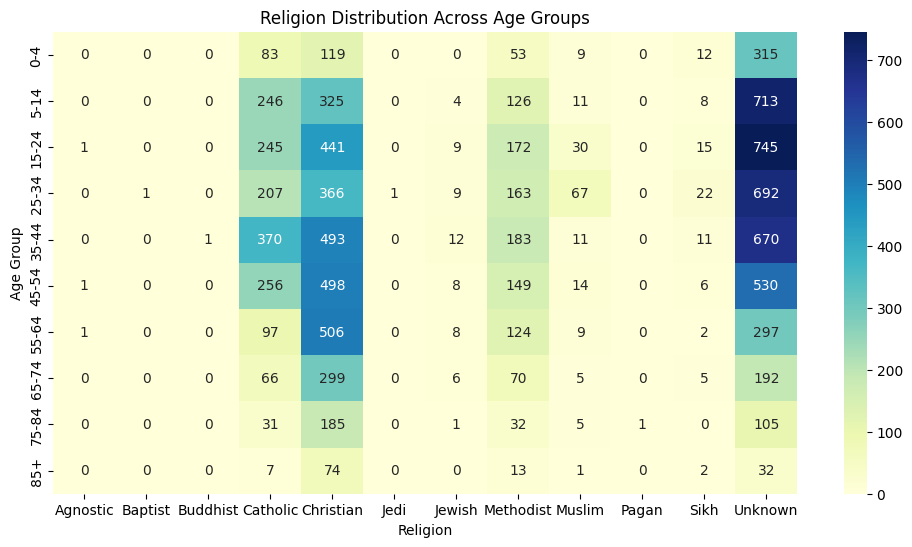

In [30]:
# Religion vs Age Group (heatmap)
rel_age = pd.crosstab(data['AgeGroup'], data['Religion'])
plt.figure(figsize=(12,6))
sns.heatmap(rel_age, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Religion Distribution Across Age Groups')
plt.ylabel('Age Group')
plt.xlabel('Religion')
plt.show()

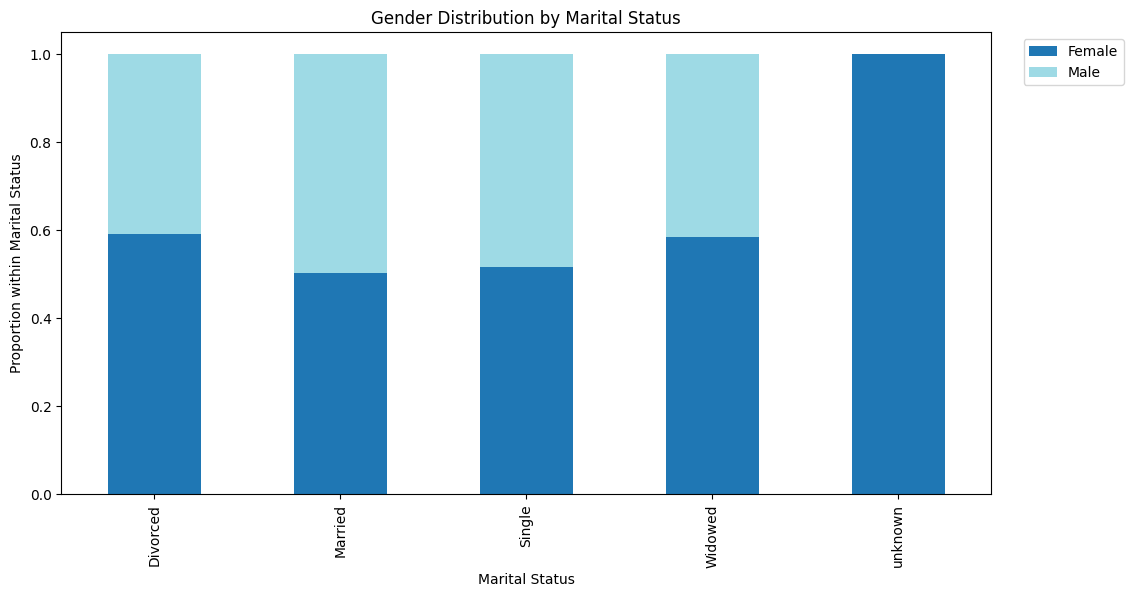

In [31]:
# Marital Status vs Occupation (stacked bar)
marital_occ = pd.crosstab(data['Marital Status'], data['Gender'])
marital_occ_prop = marital_occ.div(marital_occ.sum(axis=1), axis=0)

marital_occ_prop.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Gender Distribution by Marital Status')
plt.ylabel('Proportion within Marital Status')
plt.xlabel('Marital Status')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()